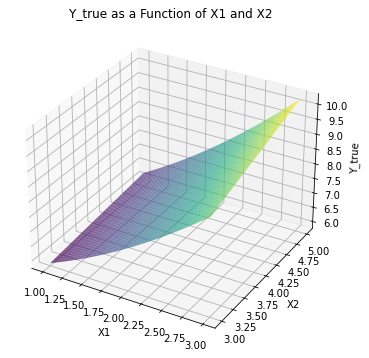

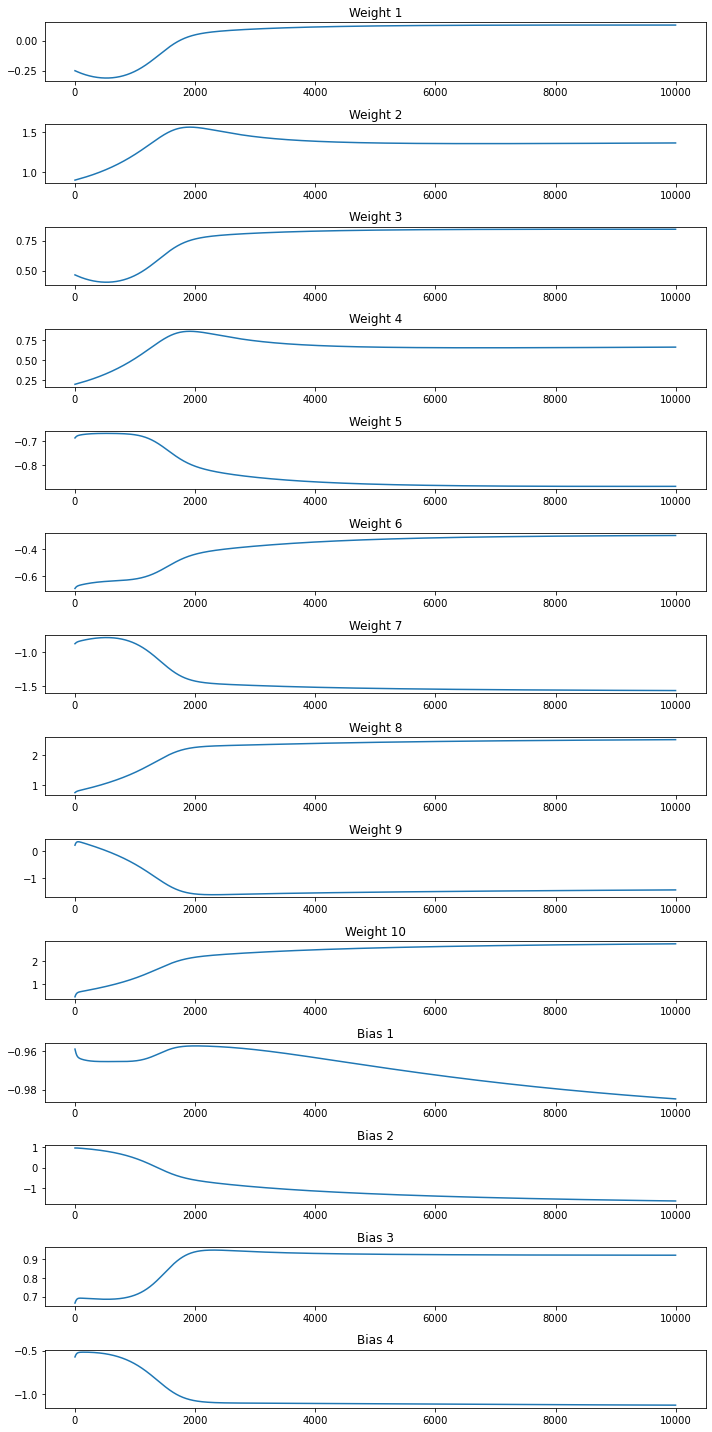

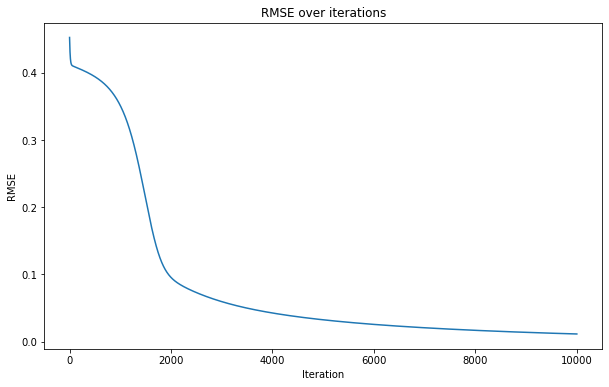

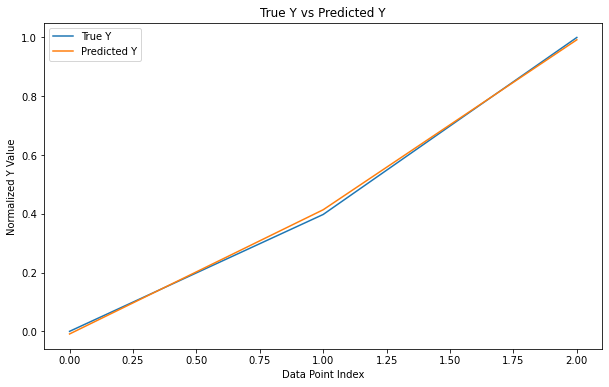

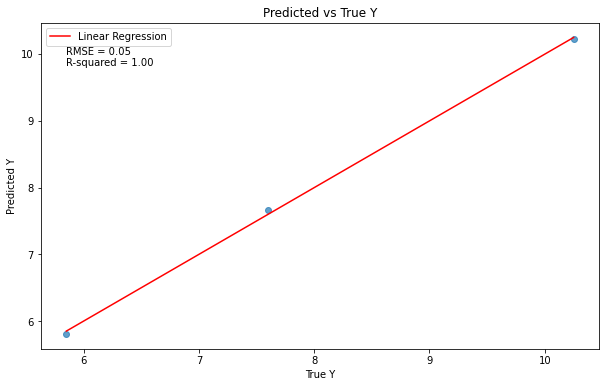

In [1]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
# Initialize input data and observed output data
X1 = np.array([1, 2, 3])
X2 = np.array([3, 4, 5])
# Generate Y_true (observed output data) using the specified function
def generate_y_true(X1, X2):
    return 0.25 * X1**2 + 0.2 * X1 * X2 + 5
Y_true = generate_y_true(X1, X2)
# Plot model of Y_true (observed output data)
X1_plot = np.linspace(np.min(X1), np.max(X1), 100)
X2_plot = np.linspace(np.min(X2), np.max(X2), 100)
X1_plot, X2_plot = np.meshgrid(X1_plot, X2_plot)
Y_true_plot = generate_y_true(X1_plot, X2_plot)

# Plotting Y_true as a function of X1 and X2
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1_plot, X2_plot, Y_true_plot, cmap='viridis', alpha=0.7)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y_true')
ax.set_title('Y_true as a Function of X1 and X2')

plt.show()

# Min-Max normalization function
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Normalize inputs and outputs
X1_normalized = normalize(X1)
X2_normalized = normalize(X2)
Y_true_normalized = normalize(Y_true)

# Initialize weights and biases
np.random.seed(42)
W11, W21, W12, W22 = 2 * np.random.rand(4) - 1 
W31, W41, W32, W42 = 2 * np.random.rand(4) - 1
W51, W52 = 2 * np.random.rand(2) - 1
b1, b2, b3, b4 = 2 * np.random.rand(4) - 1

# Lists to store weights for visualization
weights = [W11, W21, W12, W22, W31, W41, W32, W42, W51, W52]
biases = [b1, b2, b3, b4]

# Lists to store weight and bias histories for visualization
weights_history = [[] for _ in range(len(weights))]
biases_history = [[] for _ in range(len(biases))]

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Hyperparameters
learning_rate = 0.10
epochs = 10000


rmse_history = []
# Training the neural network using backpropagation
for epoch in range(epochs):
    # Forward pass
    Z11=(X1_normalized * W11 + X2_normalized * W12 + b1)
    Z12=(X1_normalized * W21 + X2_normalized * W22 + b2)
    A11 = sigmoid(Z11)
    A12 = sigmoid(Z12)
    Z21=   (A11 * W31 + A12 * W32 + b3)
    Z22=   (A11 * W41 + A12 * W42 + b4)
    A21 = sigmoid(Z21)
    A22 = sigmoid(Z22)
    Y_pred_Net = A21 * W51 + A22 *W52

    # Calculate the loss
    loss = (1/(2*len(Y_true_normalized)))*np.sum((Y_pred_Net - Y_true_normalized)**2)

    # Backward pass 
    
    #1. Partial derivatives (pd) of loss in respect to W51 and W52
    # Partial derivatives of loss in respect to pred
    d_loss_pred = (Y_pred_Net - Y_true_normalized) / len(Y_true_normalized)
      
    # Partial derivative of pred in respect to W51
    d_pred_W51=A21
    # Partial derivative of pred in respect to W52
    d_pred_W52=A22
    d_W51 =  d_loss_pred * d_pred_W51
    d_W52 =  d_loss_pred * d_pred_W52
   
   #2. Partial derivatives of loss in respect to W31 and W32
    
    # d_W31=(pd of loss in respect to pred * (pd of pred in respect to A21) * (pd A21 in respect to Z21) * (pd Z21 in respect to W31) "/Nouveau dossier"
    # in the same way for W32

    d_W31 = d_loss_pred * W51* sigmoid_derivative(Z21) * A11
    d_W32 = d_loss_pred * W51* sigmoid_derivative(Z21) * A12
    
    #3. Partial derivatives of loss in respect to W41 and W42
    # Same as above but considering the path from loss to A22
    d_W41 = d_loss_pred * W52* sigmoid_derivative(Z22) * A11
    d_W42 = d_loss_pred * W52* sigmoid_derivative(Z22) * A12
    
    #4. Partial derivatives of loss in respect to W11 and W12
    # # Same as above but considering the path from loss to A21 and to A11
    # d_W11=(pd of loss in respect to pred * (pd of pred in respect to A21) * (pd A21 in respect to Z21) * (pd Z21 in respect to A11)
    # ... * (pd A11 in respect to Z11) * (pd Z11 in respect to W11)
    
    d_W11=d_loss_pred * W51* sigmoid_derivative(Z21) * W31 * sigmoid_derivative(Z11) * X1_normalized
    d_W12=d_loss_pred * W51* sigmoid_derivative(Z21) * W31 * sigmoid_derivative(Z11) * X2_normalized
    
    #5. Partial derivatives of loss in respect to W21 and W22   
    d_W21=d_loss_pred * W52* sigmoid_derivative(Z22) * W42 * sigmoid_derivative(Z12) * X1_normalized
    d_W22=d_loss_pred * W52* sigmoid_derivative(Z22) * W42 * sigmoid_derivative(Z12) * X2_normalized
    
    #6. Partial derivatives of loss in respect to b1, b2, b3, b4
    d_b1=d_loss_pred*W51*sigmoid_derivative(Z21)*W31*sigmoid_derivative(Z11)*1
    d_b2=d_loss_pred*W52*sigmoid_derivative(Z22)*W42*sigmoid_derivative(Z12)*1
    d_b3=d_loss_pred*W51*sigmoid_derivative(Z21)*1
    d_b4=d_loss_pred*W52*sigmoid_derivative(Z22)*1
    
    
   # Update weights and biases
    W51 -= learning_rate * np.sum(d_W51)
    W52 -= learning_rate * np.sum(d_W52)

    W11 -= learning_rate * np.sum(d_W11)
    W21 -= learning_rate * np.sum(d_W21)
    b1 -= learning_rate * np.sum(d_b1)

    W12 -= learning_rate * np.sum(d_W12)
    W22 -= learning_rate * np.sum(d_W22)
    b2 -= learning_rate * np.sum(d_b2)

    W31 -= learning_rate * np.sum(d_W31)
    W41 -= learning_rate * np.sum(d_W41)
    b3 -= learning_rate * np.sum(d_b3)

    W32 -= learning_rate * np.sum(d_W32)
    W42 -= learning_rate * np.sum(d_W42)
    b4 -= learning_rate * np.sum(d_b4)

 # Calculate the RMSE
    rmse = np.sqrt(np.mean((Y_pred_Net - Y_true_normalized)**2))
    rmse_history.append(rmse)
    # Update the weights list
    weights = [W11, W21, W12, W22, W31, W41, W32, W42, W51, W52]
    # Update the biases list
    biases = [b1, b2, b3, b4]
    # Append weights and biases for visualization
    for i, weight in enumerate(weights):
        weights_history[i].append(weight)

    for i, bias in enumerate(biases):
        biases_history[i].append(bias)

# Plotting the weights over iterations
fig, axes = plt.subplots(len(weights_history) + len(biases_history), 1, figsize=(10, 20))

for i, weight_history in enumerate(weights_history):
    axes[i].plot(weight_history)
    axes[i].set_title(f'Weight {i+1}')

for i, bias_history in enumerate(biases_history):
    axes[len(weights_history) + i].plot(bias_history)
    axes[len(weights_history) + i].set_title(f'Bias {i+1}')

plt.tight_layout()
plt.show()


# Plotting the RMSE over iterations
plt.figure(figsize=(10, 6))
plt.plot(rmse_history)
plt.title('RMSE over iterations')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.show()


# Plotting the predicted Y values against the true Y values
plt.figure(figsize=(10, 6))
plt.plot(Y_true_normalized, label='True Y')
plt.plot(Y_pred_Net, label='Predicted Y')
plt.title('True Y vs Predicted Y')
plt.xlabel('Data Point Index')
plt.ylabel('Normalized Y Value')
plt.legend()
plt.show()

# Denormalize function
def denormalize(data_normalized, data):
    return data_normalized * (np.max(data) - np.min(data)) + np.min(data)

# Denormalize Y_pred
Y_pred_denormalized = denormalize(Y_pred_Net, Y_true)

# Calculate RMSE and R-squared
rmse = np.sqrt(np.mean((Y_pred_denormalized - Y_true)**2))
r2 = r2_score(Y_true, Y_pred_denormalized)
# Fit a line to the data
slope, intercept = np.polyfit(Y_true, Y_pred_denormalized, 1)

# Generate x values for the line
x_line = np.linspace(min(Y_true), max(Y_true), 100)

# Generate corresponding y values for the line
y_line = slope * x_line + intercept

# Scatter plot of the non-normalized predicted Y values against the true Y values
plt.figure(figsize=(10, 6))
plt.scatter(Y_true, Y_pred_denormalized, alpha=0.7)
plt.plot(x_line, y_line, color='red', label='Linear Regression')  # Add the regression line
plt.title('Predicted vs True Y')
plt.xlabel('True Y')
plt.ylabel('Predicted Y')

# Add RMSE and R-squared to the plot
plt.text(min(Y_true), max(Y_pred_denormalized) - 0.1, f'RMSE = {rmse:.2f}\nR-squared = {r2:.2f}', verticalalignment='top')
plt.legend()  # Add a legend
plt.show()